<span style="color:orange;font-size:20px"><b> Import </b></span><br>

!pip install -r ./requirements.txt

In [1]:
# Base
import random
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

2024-09-23 12:19:41.909350: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 12:19:41.917005: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 12:19:42.018572: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 12:19:42.168114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 12:19:42.277293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
RANDOM_STATE = 1
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
keras.utils.set_random_seed(RANDOM_STATE)

<span style="color:orange;font-size:20px"><b> Import Data </b></span><br>

In [3]:
pos = np.load('./Sweep_pos_swp.npy')
neg = np.load('./Sweep_neg_swp.npy')

In [4]:
data   = np.concatenate(( neg, pos ))
labels = np.concatenate(( np.zeros(500), np.ones(500) ))

In [5]:
print(data[1, ::10])
print('')
print(labels[::50])

[[0.02  0.028 0.015]
 [0.043 0.072 0.029]
 [0.13  0.051 0.059]
 [0.043 0.014 0.   ]
 [0.094 0.121 0.002]
 [0.086 0.044 0.   ]
 [0.06  0.051 0.007]
 [0.104 0.119 0.148]
 [0.06  0.046 0.082]
 [0.172 0.132 0.25 ]
 [0.211 0.169 0.121]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<span style="color:orange;font-size:20px"><b> Exploratory Data Analysis </b></span><br>

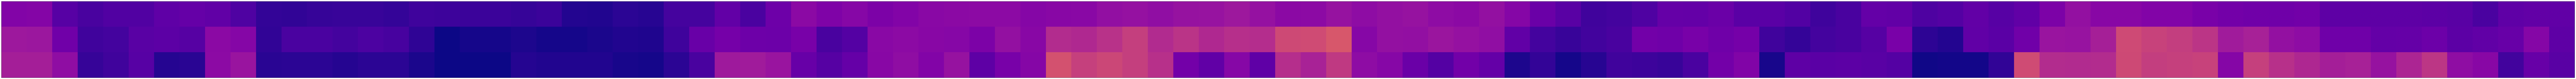

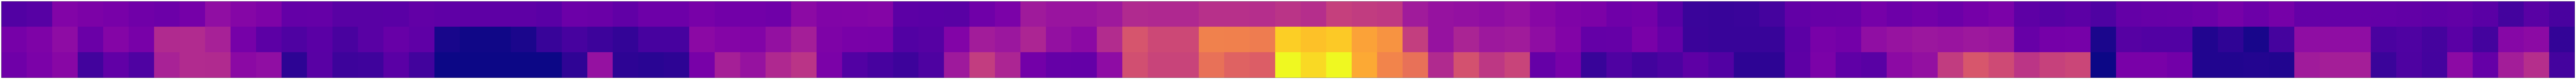

In [6]:
for sml in [55, 555]:
    plt.figure(figsize=(250,25), facecolor='w')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[sml].T, vmin = 0,vmax = 1, cmap='plasma')
    plt.show()

del(sml)

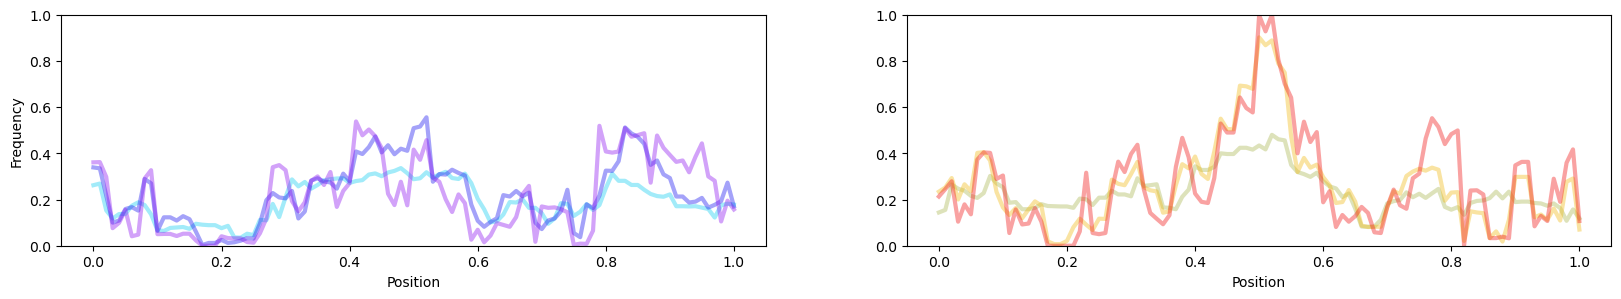

In [7]:
normalized_x1 = np.linspace(0, 1, 101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))
axes[0].plot(normalized_x1, data[55, :, 0], alpha = 0.4, color='#18CDF1', linewidth=3 )
axes[0].plot(normalized_x1, data[55, :, 1], alpha = 0.4, color='#1C18F1', linewidth=3 )
axes[0].plot(normalized_x1, data[55, :, 2], alpha = 0.4, color='#8F18F1', linewidth=3 )
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim([0, 1])

axes[1].plot(normalized_x1, data[555, :, 0], alpha = 0.4, color='#ACB854', linewidth=3 )
axes[1].plot(normalized_x1, data[555, :, 1], alpha = 0.4, color='#F1BB18', linewidth=3 )
axes[1].plot(normalized_x1, data[555, :, 2], alpha = 0.4, color='#F11818', linewidth=3 )
axes[1].set_xlabel('Position')
axes[1].set_ylim([0, 1])

plt.show()

<span style="color:orange;font-size:20px"><b> Prepare Data </b></span><br>

In [8]:
r_ind      = np.random.permutation(1000)
shf_data   = data[r_ind]
shf_labels = labels[r_ind]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( shf_data, shf_labels, test_size=0.2)

<span style="color:orange;font-size:20px"><b> Create ANN </b></span><br>

In [10]:
model = keras.Sequential([
                    # Input Layer + Flatten
                    keras.layers.Input((101, 3)),
                    keras.layers.Flatten(),
                    
                    # Hidden Layers
                    keras.layers.Dense(int(68), activation='relu'),
                    keras.layers.Dense(int(68), activation='relu'),
                    keras.layers.Dense(int(68), activation='relu'),

                    # Output Layer
                    keras.layers.Dense(1, activation='sigmoid')
                    ])

optimizer = keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

I0000 00:00:1727086808.705703    7553 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-23 12:20:08.757301: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 303)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 68)             │        20,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            69 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,125 (117.68 KB)

 Trainable params: 30,125 (117.68 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
keras.backend.clear_session()

def build_model( num_layers, num_neurons):
    model = keras.Sequential()
    
    # Input Layer + Flatten
    model.add( layers.Input((101, 3)) ),
    model.add( layers.Flatten() )

    # Hidden Layers
    for _ in range(int(num_layers)):
        model.add(layers.Dense(int(num_neurons), activation='relu'))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

<span style="color:red;font-size:14px"> - An epoch in machine learning means one complete pass of the training dataset through the iterative algorithm. Progress is achieved gradually with gradient descent, taking small steps toward improvement. <br> - Batch size refers to the number of training examples utilized in one iteration. </span>

In [ ]:
model   = build_model(1, 500)
history = model.fit( X_train, y_train, epochs=100, shuffle = True, validation_split=0.2)

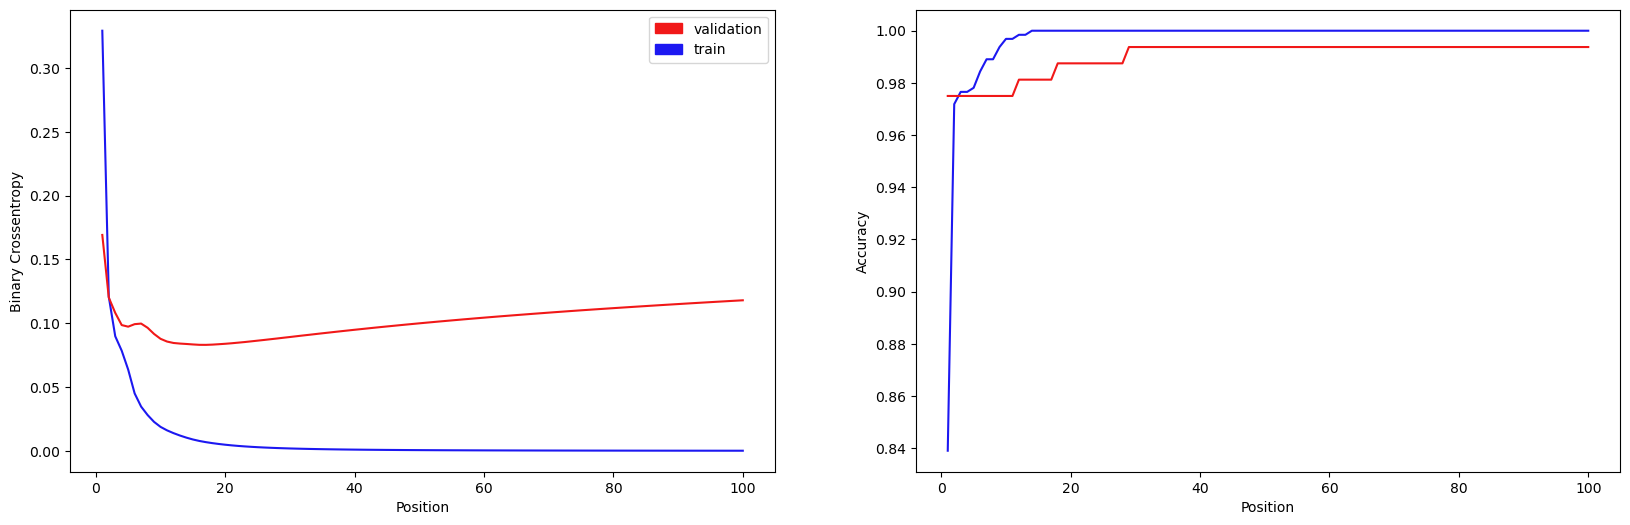

In [14]:
val = mpatches.Patch(color='#F11818', label='validation')
trn = mpatches.Patch(color='#1C18F1', label='train')

# Access the training history
loss     = history.history['loss']
acc      = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc  = history.history['val_accuracy']
epochs   = range(1, 101)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes[0].plot(epochs, loss, '#1C18F1')
axes[0].plot(epochs, val_loss, '#F11818')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Binary Crossentropy')
axes[0].legend(handles=[val, trn])

axes[1].plot(epochs, acc, '#1C18F1')
axes[1].plot(epochs, val_acc, '#F11818')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Accuracy')

plt.show()

In [15]:
y_pred = model.predict(X_test)
print(y_pred[:5])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[1.        ]
 [1.        ]
 [0.9999908 ]
 [0.99999535]
 [0.15445514]]


In [16]:
binary_pred = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


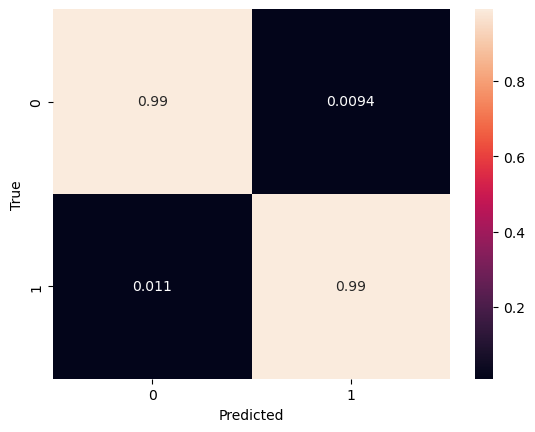

In [17]:
cm = confusion_matrix(binary_pred, y_test)
sns.heatmap(cm/sum(cm), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<span style="color:orange;font-size:20px"><b> Create DT </b></span><br>

In [24]:
# Create a Linear Regression model and train it
X_train2, X_test2, y_train2, y_test2 = train_test_split( shf_data.reshape((1000, 101*3)), shf_labels, test_size=0.2)
dt = DecisionTreeClassifier()
dt.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [25]:
# Make predictions on the test set
y_pred2 = dt.predict(X_test2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracy)

Accuracy: 0.995


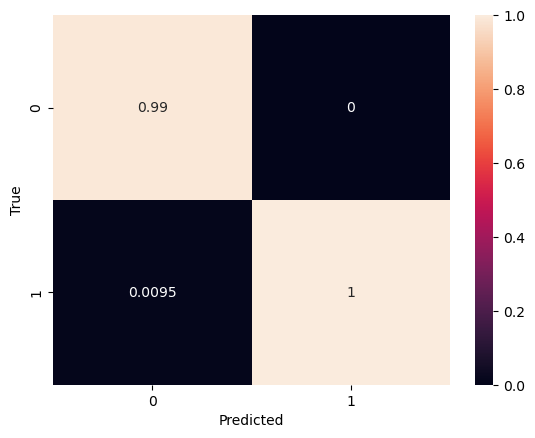

In [26]:
cm = confusion_matrix(y_pred2, y_test2)
sns.heatmap(cm/sum(cm), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[Text(0.6666666666666666, 0.875, 'x[152] <= 0.692\ngini = 0.5\nsamples = 800\nvalue = [395, 405]'),
 Text(0.5, 0.625, 'x[126] <= 0.004\ngini = 0.005\nsamples = 396\nvalue = [395, 1]'),
 Text(0.3333333333333333, 0.375, 'x[244] <= 0.1\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 392\nvalue = [392, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 404\nvalue = [0, 404]')]

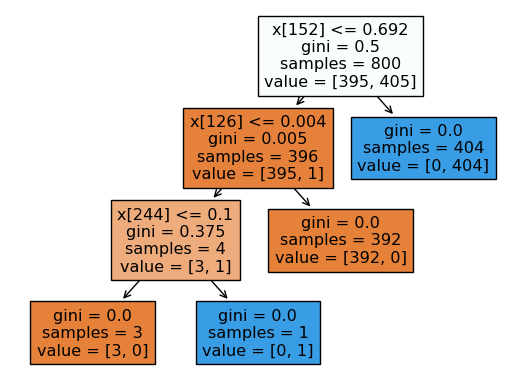

In [27]:
plot_tree(dt, filled=True)